In [ ]:
'''
PRCV: Final Project
Author: Dhruvil Parikh

This notebook takes the weights of the 4 trained models and uses them in conjunction with opencv functions to produce an output image which is upscaled.
The original code was supposed to be a github repository but for the ease of use, I have written this notebook so that it can be easily run after uploading the necessary data directly on Colab.
The usage is as directed in the comments at the concerned sections.

[CAUTION]: THIS NOTEBOOK WILL NOT RUN WITHOUT UPLOADING THE NETWORKS AND IMAGES.
'''

In [1]:
# Installing the necessary opencv package:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 1.4 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


Time taken for implementing Super Resolution Model: 0.02097320556640625
Time taken for Bicubic Interpolation: 0.0008754730224609375


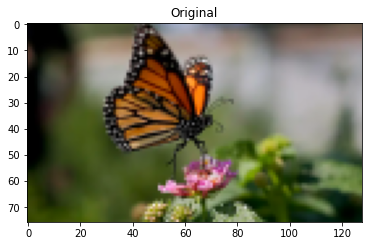

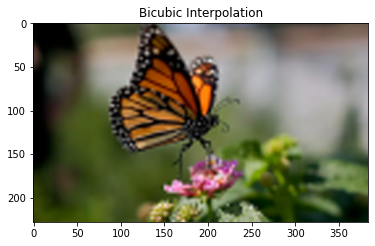

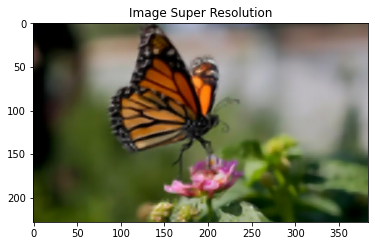

In [13]:
# Importing required Libraries
import cv2
import os
import argparse
import imutils
import time
import matplotlib.pyplot as plt

# Defining a function to display images
def disp(title, img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title(title)
  plt.grid(False)
  plt.show()

# Using OpenCV built-in function to perform Super Resolution

# Hard coding the arguments:

'''
Available Model Names:
1) EDSR_x4.pb
2) ESPCN_x4.pb
3) FSRCNN_x3.pb
4) LapSRN_x8.pb
'''

args = {"model": "Networks/FSRCNN_x3.pb", # Change this path to change the model
        "img": "Images/butterfly.png"}    # Change this path to change the target image

# Getting the name of the model and the scale from the provided file path
model_name = args["model"].split(os.path.sep)[-1].split("_")[0].lower()
model_scale = args["model"].split("_x")[-1]
model_scale = int(model_scale[:model_scale.find(".")])

# Initializing the super resolution Dense Neural Network object of opencv, loading the super resolution model and setting the nae and scale
super_res = cv2.dnn_superres.DnnSuperResImpl_create()
super_res.readModel(args["model"])
super_res.setModel(model_name, model_scale)

# Loading the target image and scaling it to a size of a maximum width of 128 pixels
img = cv2.imread(args["img"])
img = imutils.resize(img, width = 128)

# Applying the Super Resolution model and calculating the time
start = time.time()
upsampled = super_res.upsample(img)
stop = time.time()
print("Time taken for implementing Super Resolution Model: " + str(stop - start))

# Resizing the image using standard Bicubic Interpolation
start = time.time()
bicubic_interpolated = cv2.resize(img, (upsampled.shape[1], upsampled.shape[0]), interpolation = cv2.INTER_CUBIC)
stop = time.time()
print("Time taken for Bicubic Interpolation: " + str(stop - start))

# Displaying the original image, the bicubically interpolated image and the super resolution deep learning model implemented image
disp("Original", img)
disp("Bicubic Interpolation", bicubic_interpolated)
disp("Image Super Resolution", upsampled)

In [16]:
# If you want to save the images, run this cell:

# !pwd

cv2.imwrite("/content/Original.png", img)
cv2.imwrite("/content/Bicubic.png", bicubic_interpolated)
cv2.imwrite("/content/Image Super Resolution.png", upsampled)

True